In [565]:
import numpy as np
import scipy
import sklearn
import autograd.numpy as np
from autograd import grad
import pickle
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import model_selection
import pandas as pd
from sklearn import datasets
from tqdm import tqdm
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from tqdm import tqdm
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import torch
from plot_lib import set_default, plot_data, plot_model, set_default
import random
from torch import nn, optim
from IPython import display
set_default()
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve
import torch
import random
from torch import nn, optim
from IPython import display
set_default()
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster import vq 
from sklearn import cluster  
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.manifold import MDS 
from scipy.spatial.distance import squareform
import time
import math
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, fetch_openml
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.stats import multivariate_normal as normal
from sklearn import mixture 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

In [566]:
import numpy as np
import pandas as pd
import math 
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from tqdm import tqdm
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import torch
from plot_lib import set_default, plot_data, plot_model, set_default
import random
from torch import nn, optim
import math
from IPython import display
set_default()
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import model_selection
from sklearn.metrics import roc_curve
import torch
import random
from torch import nn, optim
import math
from IPython import display
set_default()
import tensorflow as tf

In [567]:
pd.set_option('display.max_rows', 10, 'display.max_columns', 18)
data = pd.read_csv(r'/Users/Eric/opt/anaconda3/envs/Lab1/musicData.csv')
data.dropna(inplace=True) #drop na
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [568]:
import random
random.seed(15451774)

In [569]:
df = data
df['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [570]:
df = df.replace(['Electronic','Anime',"Jazz","Alternative","Country","Rap","Blues","Rock","Classical","Hip-Hop"], [1,2,3,4,5,6,7,8,9,10])

In [571]:
df['key'].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
      ... 
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, Length: 12, dtype: int64

In [572]:
df = df.replace(['G','C','C#','D','A','F','B','E','A#','G#','F#','D#'], [1,2,3,4,5,6,7,8,9,10,11,12])

In [573]:
df['duration_ms'].value_counts()

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: duration_ms, Length: 26028, dtype: int64

In [574]:
df = df.replace(['Minor','Major'], [0,1])
df.tail()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,3,0.119,-7.022,1,0.2980,98.02799999999999,4-Apr,0.330,10
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,7,0.109,-9.814,1,0.0550,122.04299999999999,4-Apr,0.113,10
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,4,0.143,-5.443,1,0.1460,131.079,4-Apr,0.395,10
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,1,0.106,-5.016,0,0.0441,75.88600000000001,4-Apr,0.354,10
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,11,0.272,-13.652,0,0.1010,99.20100000000001,4-Apr,0.765,10


In [575]:
df = df.drop(columns=['instance_id', 'artist_name','track_name','obtained_date'])

In [576]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
mean_value = df['tempo'].median()
df['tempo'].fillna(value = mean_value, inplace=True)
#deal with ? value

In [577]:
df1 = df
df1 = df1[df1.duration_ms != -1.0]
mean_value = df1['duration_ms'].median()
df['duration_ms'] = df['duration_ms'].replace(-1.0, mean_value)
#deal with -1.0 value

In [578]:
X = df[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']]
y = df['music_genre'] 
#test train split with stratify feature
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=5000, random_state=15451774, stratify = y) 


In [579]:
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [580]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X_train)

PCA(n_components=2, whiten=True)

In [581]:
X1 = X_train.to_numpy()
mu = np.mean(X1, axis=0)
C = np.cov(X1.T)
eigvals, eigvecs = np.linalg.eig(C)
print(eigvals)

[3.70380579 1.36301195 0.11067275 0.25637161 0.45984542 1.17941513
 0.58826445 0.70106588 1.05031415 0.80128291 0.86891279 0.97022066
 0.94710541]


In [536]:
#experimenting with which column to normalize 

#from scipy.stats import zscore
#cols = list(X_train.columns)
#cols.remove('acousticness')
#cols.remove('danceability')
#cols.remove('energy')
#cols.remove('instrumentalness')
#cols.remove('liveness')
#cols.remove('speechiness')
#cols.remove('valence')
#X_train_zscore = (X_train[cols] - X_train[cols].mean())/X_train[cols].std()
#X_train_zscore['acousticness'] = X_train['acousticness']
#X_train_zscore['danceability'] = X_train['danceability']
#X_train_zscore['energy'] = X_train['energy']
#X_train_zscore['instrumentalness'] = X_train['instrumentalness']
#X_train_zscore['liveness'] = X_train['liveness']
#X_train_zscore['speechiness'] = X_train['speechiness']
#X_train_zscore['valence'] = X_train['valence']

#cols = list(X_test.columns)
#cols.remove('acousticness')
#cols.remove('danceability')
#cols.remove('energy')
#cols.remove('instrumentalness')
#cols.remove('liveness')
#cols.remove('speechiness')
#cols.remove('valence')
#X_test_zscore = (X_test[cols] - X_test[cols].mean())/X_test[cols].std()
#X_test_zscore['acousticness'] = X_test['acousticness']
#X_test_zscore['danceability'] = X_test['danceability']
#X_test_zscore['energy'] = X_test['energy']
#X_test_zscore['instrumentalness'] = X_test['instrumentalness']
#X_test_zscore['liveness'] = X_test['liveness']
#X_test_zscore['speechiness'] = X_test['speechiness']
#X_test_zscore['valence'] = X_test['valence']

#X_train = X_train_zscore
#X_test = X_test_zscore

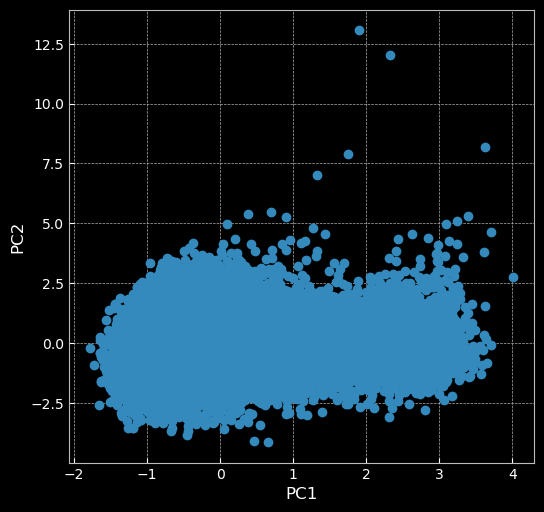

In [537]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
columns = ['pca_%i' % i for i in range(2)]
X_train_pca = DataFrame(pca.transform(X_train), columns=columns, index = X_train.index)
X_train_pca.plot(x='pca_0', y='pca_1', style='o', legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [538]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X_test)
columns = ['pca_%i' % i for i in range(2)]
X_test_pca = DataFrame(pca.transform(X_test), columns=columns, index = X_test.index)

/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


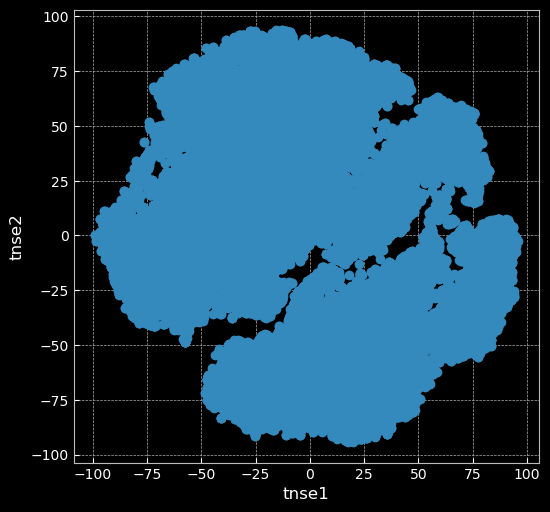

In [163]:
n = 40 
df_embedded = TSNE(n_components=2, perplexity = n, learning_rate='auto').fit_transform(X_train)
columns = ['tsne_%i' % i for i in range(2)]
df_tsne = DataFrame(df_embedded, columns=columns, index = X_train.index)
df_tsne.plot(x='tsne_0', y='tsne_1', style='o', legend=False)
plt.xlabel('tnse1')
plt.ylabel('tnse2')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [180]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=15451774)
    cluster_labels = clusterer.fit_predict(df_embedded)
    silhouette_avg = silhouette_score(df_embedded, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average tsne silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average tsne silhouette_score is : 0.38887903
For n_clusters = 3 The average tsne silhouette_score is : 0.39409158
For n_clusters = 4 The average tsne silhouette_score is : 0.40149966
For n_clusters = 5 The average tsne silhouette_score is : 0.3861288
For n_clusters = 6 The average tsne silhouette_score is : 0.38980335


In [495]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=15451774)
    cluster_labels = clusterer.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average pca silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average pca silhouette_score is : 0.404122558482431
For n_clusters = 3 The average pca silhouette_score is : 0.34483326935972897
For n_clusters = 4 The average pca silhouette_score is : 0.3459139637925193
For n_clusters = 5 The average pca silhouette_score is : 0.33649374938806104
For n_clusters = 6 The average pca silhouette_score is : 0.3250349526079134


In [560]:
#append the clustering result to both train set and test set
clusterer = KMeans(n_clusters = 2, random_state = 15451774)
train_labels = clusterer.fit_predict(X_train_pca)
X_train_cluster = X_train.copy()
X_train_cluster['clusters'] = train_labels

test_labels = clusterer.predict(X_test_pca)
X_test_cluster = X_test.copy()
X_test_cluster['clusters'] = test_labels

In [548]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000, max_samples=1.0, max_features=0.3,bootstrap=True, criterion='gini')
clf.fit(X_train_cluster, y_train)

RandomForestClassifier(max_features=0.3, max_samples=1.0, n_estimators=1000)

In [549]:
auc = roc_auc_score(y_test, clf.predict_proba(X_test_cluster), average="weighted",multi_class='ovr')
print(auc)

0.9200337555555554


In [562]:
X_train_cluster

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,clusters
25362,0.564180,-0.614957,0.873216,-0.256791,0.577986,0.038333,-1.394703,0.076672,0.079768,0.747109,-0.058082,-1.099816,0.742580,0
41193,-0.206057,1.967632,-2.011650,0.264876,-1.535075,2.112533,-1.394703,1.043825,-1.526759,-1.338493,-0.564152,-0.843395,-1.590816,1
31868,0.243248,1.750633,0.255832,-0.156402,-0.340572,-0.557741,0.443415,3.201321,-0.031055,-1.338493,-0.386237,0.139913,1.859502,0
4026,0.050689,0.087946,1.142620,-0.058734,1.352900,-0.557780,0.137062,-0.768348,1.164794,-1.338493,1.319770,1.031271,-1.473459,0
31396,-1.233040,1.941240,-0.670243,-0.528440,-1.455693,-0.557585,-1.394703,-0.065921,-1.156484,0.747109,-0.320013,-0.002474,-0.066784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1.141858,0.357729,-0.692694,0.291356,0.449463,-0.557808,0.749768,-0.568097,0.375079,-1.338493,0.548805,-0.923942,-1.292970,0
29692,1.719535,-0.896737,-0.726369,0.327094,1.383141,-0.176770,1.362474,1.099622,0.734483,0.747109,-0.199426,-0.002474,0.277196,0
219,-0.270243,-0.897227,0.216544,0.823052,1.402041,0.035260,0.137062,0.368058,1.139481,-1.338493,-0.442576,-0.002474,-0.779024,0
5489,-1.040480,-0.442824,0.042554,0.362592,0.517505,-0.557808,0.137062,0.603646,1.060461,0.747109,-0.611596,-0.341991,0.301477,0


In [551]:
aucmin = 1
index = 0

for i in range(0, 14):
    x_train = X_train_cluster.drop(X_train_cluster.columns[i], axis=1)
    x_test = X_test_cluster.drop(X_test_cluster.columns[i], axis=1)
    clf = RandomForestClassifier(n_estimators=100, max_samples=1.0, max_features=0.3,bootstrap=True, criterion='gini')
    clf.fit(x_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(x_test), average="weighted",multi_class='ovr')
    print(i,auc)
    if aucmin > auc:
        aucmin = auc
        index = i
print('The least auc is'aucmin)
print('The index for that predictor is'index)

0 0.8609906222222222
1 0.9166742
2 0.9137672
3 0.9164704222222223
4 0.9190704444444444
5 0.9132226444444445
6 0.9200278444444444
7 0.9200061555555556
8 0.9180211333333332
9 0.9194041111111112
10 0.9123404222222223
11 0.9190765555555556
12 0.916011688888889
13 0.9200280222222221
0.8609906222222222
0


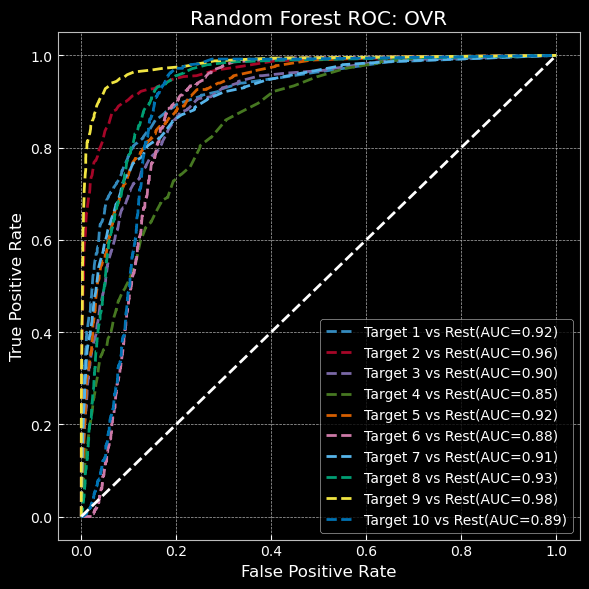

In [178]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
classes = np.unique(y_test)
fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_classes=classes.shape[0]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.patch.set_facecolor('black')
for i in range(n_classes):
    
    fpr[i],tpr[i],thresh[i] = metrics.roc_curve(y_test_binarized[:,i], clf.predict_proba(X_test_cluster)[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',label='Target %s vs Rest(AUC=%0.2f)'% (classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'w--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC: OVR)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [246]:
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier 
svm = LinearSVC(C = 1, dual = False)
svm.fit(X_train_cluster, y_train)
svmpred = svm.predict(X_test_cluster)
acc = metrics.accuracy_score(y_test, svmpred)
print('SVM accuracy = {:0.1f}%'.format(100*acc))

model = SGDClassifier(loss='hinge')
model.fit(X_train_cluster, y_train)
y_train_pred = model.decision_function(X_train_cluster)    
y_test_pred = model.decision_function(X_test_cluster) 

SVM accuracy = 50.2%


In [250]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(y_test)
car_df_encoded = pd.DataFrame(data_encoded)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(X_)
car_df_encoded['class'] = target_encoded

In [249]:
y_test_pred.shape 

(5000, 10)

/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-pack

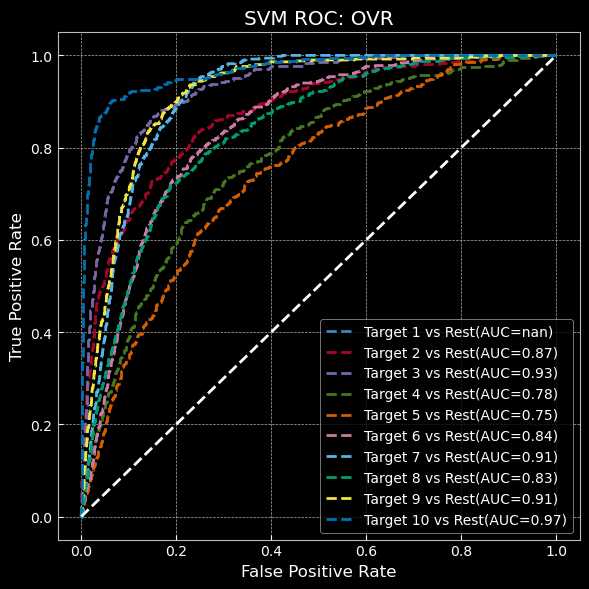

In [200]:
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train, classes=[1,2,3,4,5,6,7,8,9,10])
y_test = label_binarize(y_test, classes=[1,2,3,4,5,6,7,8,9,10])
clf = OneVsRestClassifier(LinearSVC(random_state = 15451774))
y_score = clf.fit(X_train_cluster, y_train).decision_function(X_test_cluster)
n_classes = 10

fpr={}
tpr={}
thresh={}
roc_auc=dict()

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.patch.set_facecolor('black')
for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',label='Target %s vs Rest(AUC=%0.2f)'% (classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'w--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC: OVR')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [175]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1
)
bdt.fit(X_train_cluster, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=2000)

In [176]:
auc = roc_auc_score(y_test, bdt.predict_proba(X_test_cluster), multi_class='ovr')
print(auc)

0.8828175999999999


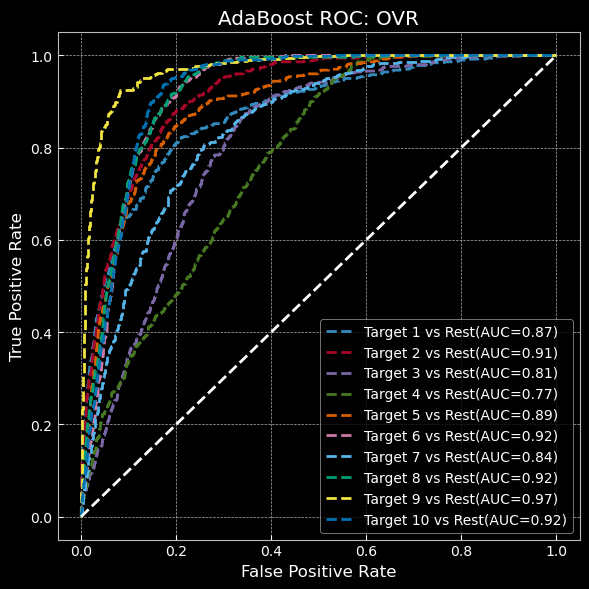

In [179]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
classes = np.unique(y_test)
fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_classes=classes.shape[0]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
fig.set_size_inches(10, 10 )
axs.patch.set_facecolor('black')
for i in range(n_classes):
    
    fpr[i],tpr[i],thresh[i] = metrics.roc_curve(y_test_binarized[:,i], bdt.predict_proba(X_test_cluster)[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',label='Target %s vs Rest(AUC=%0.2f)'% (classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'w--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC: OVR')   
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [437]:
D = 14
H = 16
model = nn.Sequential(
    nn.Linear(14, 16),
    nn.ReLU(),
    nn.Linear(16, 12),
    nn.ReLU(),
    nn.Linear(12, 10),
    nn.Softmax()
)
print(model)

Sequential(
  (0): Linear(in_features=14, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=10, bias=True)
  (5): Softmax(dim=None)
)


In [438]:
X_train_nn = torch.from_numpy(X_train_cluster.to_numpy()).float()
y_train_nn = torch.from_numpy((y_train-1).to_numpy())
X_test_nn = torch.from_numpy(X_test_cluster.to_numpy()).float()
y_test_nn = torch.from_numpy((y_test-1).to_numpy())

In [439]:
learning_rate = 1e-2
lambda_l2 = 1e-5
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) 

for t in range(2000):
    y_pred = model(X_train_nn)
    loss = criterion(y_pred, y_train_nn)
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_nn == predicted).sum().float() / len(y_train_nn)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

[EPOCH]: 1999, [LOSS]: 1.864248, [ACCURACY]: 0.600


In [440]:
y_pred = model(X_test_nn)
y_pred = y_pred.detach().numpy()

In [441]:
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(auc)

0.905420688888889


/Users/Eric/opt/anaconda3/envs/Lab1/lib/python3.9/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


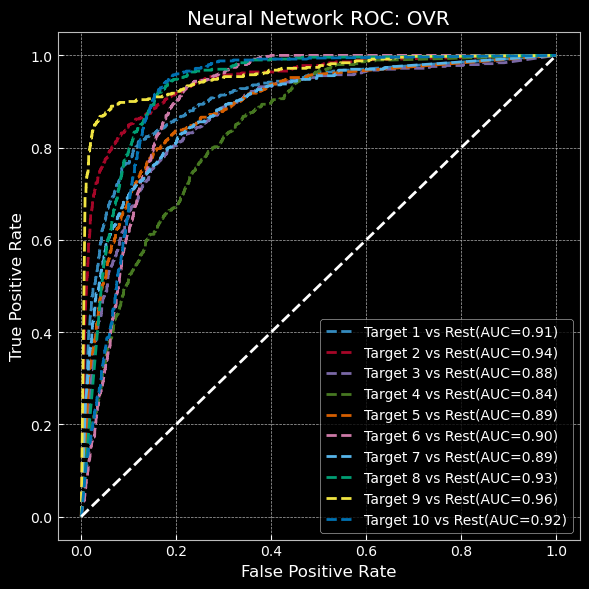

In [444]:
y_pred = model(X_test_nn)
y_pred = y_pred.detach().numpy()
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
classes = np.unique(y_test)
fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_classes=classes.shape[0]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.patch.set_facecolor('black')
for i in range(n_classes):
    
    fpr[i],tpr[i],thresh[i] = metrics.roc_curve(y_test_binarized[:,i], y_pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',label='Target %s vs Rest(AUC=%0.2f)'% (classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'w--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC: OVR')   
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)
fig.savefig('test2png.png', dpi=100)

In [552]:
X_train_cluster['labels'] = y_train
df1 = X_train_cluster[X_train_cluster['clusters']== 1 ] 
df2 = X_train_cluster[X_train_cluster['clusters']== 0 ]

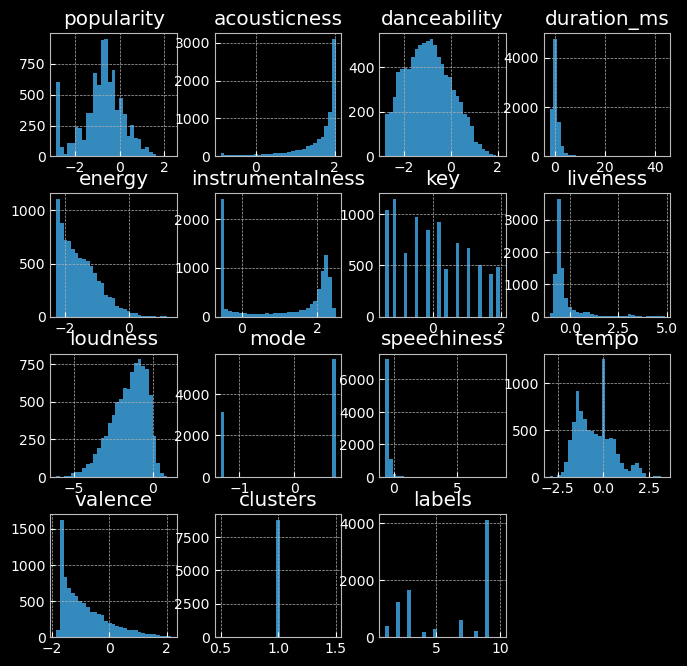

In [557]:
hist = df1.hist(bins=31)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

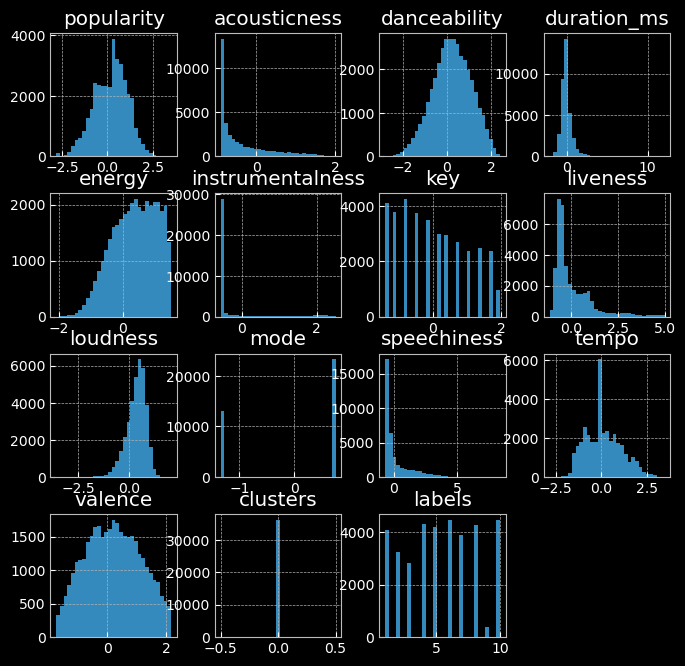

In [558]:
hist = df2.hist(bins=31)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

In [ ]:
#FAMD, NOT USED IN LATER CLASSIFICATION
import prince
famd = prince.FAMD(n_components=2,n_iter=3, engine='auto')

famd = famd.fit(X_train_zscore)
famd.row_coordinates(X_train_zscore)

ax = famd.plot_row_coordinates(
...     X_train_zscore,
...     ax=None,
...     figsize=(12, 12),
...     x_component=0,
...     y_component=1,
...     show_points=True
... )